# Setup

In [ ]:
%reload_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
SYS_PROJECT_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/ocr'
SYS_SRC_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr'
# SYS_CONFIG_DIR  = '/content/gdrive/MyDrive/Colab Notebooks/deoptima/deoptima/deoptima/config'
# SYS_RUNTIME_DIR = '/content/gdrive/MyDrive/Colab Notebooks/deoptima/deoptima/runtime'

In [ ]:
import os
import pandas as pd
import shutil

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.copy_on_write = True

# Installs

In [ ]:
import os

requirements = """
python-dotenv==1.0.1
"""

requirements_path = os.path.join(SYS_SRC_DIR, 'requirements.txt')
with open(requirements_path, 'w') as f:
    f.write(requirements)

22

In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
import os
requirements_path = os.path.join(SYS_SRC_DIR, 'requirements.txt')
!pip install -q -r '{requirements_path}'

In [ ]:
import sys
import os

if SYS_PROJECT_DIR not in sys.path:
    sys.path.append(SYS_PROJECT_DIR)

In [ ]:
os.chdir(SYS_SRC_DIR)
from dotenv import load_dotenv
_ = load_dotenv('.env')
from dotenv import dotenv_values
env_from_file = dotenv_values('.env')
env_from_file

# Explore Data

# Evaluation Summary

## VIDEO_IDS

In [ ]:
VIDEO_IDS = {
    "legal_document_01": "m-z-0194c270-bbfb-7dd2-aaec-62d909b97b32",
    "react_05": "m-z-0194c272-dd5c-7a62-8d86-a47e3c4e4670",
    "react_03": "m-z-0194c27c-894f-7e11-beac-6da09861f796",
    "css_02": "m-z-0194c27c-aebe-75d0-812f-06fbeb60b7d6",
    "react_01": "m-z-0194c27c-d107-7030-b990-0b5cc62f514a",
    "stock_market_ticker_01": "m-z-0194c27c-f30c-7803-b2ca-8f1026c940a2",
    "CNBC_01": "m-z-0194c27d-10a6-7531-9aaf-d7940a9469b1",
    "legal_document_03": "m-z-0194c27d-2e68-7e63-b44e-5abbe36938df",
    "new_paper_reading_04": "m-z-0194c27d-50bc-7c22-9d73-3756717196d5",
    "white_board_music_theory_01": "m-z-0194c27d-71a3-72c2-9710-773f6f6b80b5",
    "handwriting_analysis_02": "m-z-0194c27d-98b2-75c0-afff-77c8b24515bc",
    "react_animation_02": "m-z-0194c27d-b22a-7982-a796-e332a82d5596",
    "film_analysis_02": "m-z-0194c27d-d8d7-73b3-b136-1f4af218cb12",
    "billboard_pederstian": "m-z-0194c27d-f7f8-7d03-b053-7f0e75498476",
    "CNBC_04": "m-z-0194c27e-19c0-7270-9b2e-d467ff30fd1a",
    "cursive_writing_whiteboard": "m-z-0194c27e-408d-73b1-b550-5bf76fb0339d",
    "legal_document_05": "m-z-0194c27e-5dcf-73b3-a129-e9217d8e611f",
    "react_animation_01": "m-z-0194c27e-99ce-7fc0-867f-9bc8358d3388",
    "stock_market_ticker_02": "m-z-0194c27e-fe96-7403-a0d8-17a033e5f595",
    "walk_sign": "m-z-0194c27f-2095-76a3-bc26-96f1167e2526",
    "white_board_music_theory_02": "m-z-0194c27f-60d8-74e2-b777-bfed7d9b49d4",
    "handwriting_analysis_01": "m-z-0194c27f-836c-72f2-8c43-2eeedd6dbc2b",
    "css_01": "m-z-0194c27f-a202-7f00-80a9-3bb8a3bf257d",
    "cursive_handwriting_01": "m-z-0194c27f-e828-7f43-be2e-7fa19bc39dd4",
    "calculus_limits_01": "m-z-0194c280-0778-7b52-8268-c6f1d00dbd52",
}

## input data - gpt-4o

In [ ]:
model_id = 'gpt-4o'

In [ ]:
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'
run_ids = {
    'ocr_2025-03-09_14-52-43': VIDEO_IDS['legal_document_01'],
    'ocr_2025-03-10_00-37-25': VIDEO_IDS['react_05'],
    'ocr_2025-03-10_01-23-59': VIDEO_IDS['react_03'],
    'ocr_2025-03-10_02-06-01' : VIDEO_IDS['css_02'],
    # ? : VIDEO_IDS['react_01'],
    # ? : VIDEO_IDS['stock_market_ticker_01'],
    # ? : VIDEO_IDS['CNBC_01'],
    # ? : VIDEO_IDS['legal_document_03'],
    # ? : VIDEO_IDS['new_paper_reading_04'],
    # ? : VIDEO_IDS['white_board_music_theory_01'],
    # ? : VIDEO_IDS['handwriting_analysis_02'],
    # ? : VIDEO_IDS['react_animation_02'],
    # ? : VIDEO_IDS['film_analysis_02'],
    # ? : VIDEO_IDS['billboard_pederstian'],
    # ? : VIDEO_IDS['CNBC_04'],
    # ? : VIDEO_IDS['cursive_writing_whiteboard'],
    # ? : VIDEO_IDS['legal_document_05'],
    # ? : VIDEO_IDS['react_animation_01'],
    # ? : VIDEO_IDS['stock_market_ticker_02'],
    # ? : VIDEO_IDS['walk_sign'],
    # ? : VIDEO_IDS['white_board_music_theory_02'],
    # ? : VIDEO_IDS['handwriting_analysis_01'],
    # ? : VIDEO_IDS['css_01'],
    # ? : VIDEO_IDS['cursive_handwriting_01'],
    # ? : VIDEO_IDS['calculus_limits_01'],
}


## input data - mistral-ocr-latest

In [ ]:
# model_id = 'mistral-ocr-latest'

In [ ]:
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/mistral_results/mistral-ocr-latest'
# run_ids = {
#     'ocr_2025-03-09_21-42-02': VIDEO_IDS['legal_document_01'],
#     'ocr_2025-03-10_00-00-47': VIDEO_IDS['react_05'],
#     'ocr_2025-03-10_00-22-59': VIDEO_IDS['react_03'],
#     'ocr_2025-03-10_00-34-05': VIDEO_IDS['css_02'],
#     'ocr_2025-03-10_00-41-53': VIDEO_IDS['react_01'],
# }

## input data - gemini-2.0-flash

In [ ]:
model_id = 'gemini-2.0-flash'

In [ ]:
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gemini_results/gemini-2.0-flash'
run_ids = {
    'ocr_2025-03-11_00-59-10': VIDEO_IDS['legal_document_01'],
    'ocr_2025-03-17_00-49-02' : VIDEO_IDS['react_05'],
    'ocr_2025-03-17_00-53-59' : VIDEO_IDS['react_03'],
    'ocr_2025-03-17_00-55-12' : VIDEO_IDS['css_02'],
    'ocr_2025-03-17_01-00-20' : VIDEO_IDS['react_01'],
    'ocr_2025-03-17_01-02-32' : VIDEO_IDS['stock_market_ticker_01'],
    # ? : VIDEO_IDS['CNBC_01'],
    # ? : VIDEO_IDS['legal_document_03'],
    # ? : VIDEO_IDS['new_paper_reading_04'],
    # ? : VIDEO_IDS['white_board_music_theory_01'],
    # ? : VIDEO_IDS['handwriting_analysis_02'],
    # ? : VIDEO_IDS['react_animation_02'],
    # ? : VIDEO_IDS['film_analysis_02'],
    # ? : VIDEO_IDS['billboard_pederstian'],
    # ? : VIDEO_IDS['CNBC_04'],
    # ? : VIDEO_IDS['cursive_writing_whiteboard'],
    # ? : VIDEO_IDS['legal_document_05'],
    # ? : VIDEO_IDS['react_animation_01'],
    # ? : VIDEO_IDS['stock_market_ticker_02'],
    # ? : VIDEO_IDS['walk_sign'],
    # ? : VIDEO_IDS['white_board_music_theory_02'],
    # ? : VIDEO_IDS['handwriting_analysis_01'],
    # ? : VIDEO_IDS['css_01'],
    # ? : VIDEO_IDS['cursive_handwriting_01'],
    # ? : VIDEO_IDS['calculus_limits_01'],
}

## Prepare evaluation

In [ ]:
import os
import pandas as pd

evaluation_df = pd.DataFrame()

evaluation_summary_vid = []

for k, v in run_ids.items():
  evaluation_path = os.path.join(evaluation_model_dir, k, 'evaluations', v + '.json')
  i_df = pd.read_json(evaluation_path)
  i_summary = {
              "model": model_id,
              "vid": v,
              "total_frames": i_df.shape[0],
              "avg_cer": np.round(np.average(i_df['cer']),4),
              "avg_wer": np.round(np.average(i_df['wer']),4),
              "avg_acc": np.round(np.average(i_df['accuracy']),2),
              "avg_order_agnostic_acc": np.round(np.average(i_df['order_agnostic_accuray']),2),
              "avg_processing_time": np.round(np.average(i_df['processing_time']),3),
              }
  evaluation_summary_vid.append(i_summary)
  evaluation_df = pd.concat([evaluation_df, i_df], axis = 0)


In [ ]:
import numpy as np

evaluation_summary = {
    "model": model_id,
    "total_vids": len(run_ids.values()),
    "total_frames": evaluation_df.shape[0],
    "avg_cer": np.round(np.average(evaluation_df['cer']),4),
    "avg_wer": np.round(np.average(evaluation_df['wer']),4),
    "avg_acc": np.round(np.average(evaluation_df['accuracy']),2),
    "avg_order_agnostic_acc": np.round(np.average(evaluation_df['order_agnostic_accuray']),2),
    "avg_processing_time": np.round(np.average(evaluation_df['processing_time']),3),
    }

evaluation_summary

{'model': 'gpt-4o',
 'total_vids': 3,
 'total_frames': 146,
 'avg_cer': 0.1851,
 'avg_wer': 0.4502,
 'avg_acc': 81.49,
 'avg_order_agnostic_acc': 85.56,
 'avg_processing_time': 3.515}

In [ ]:
import json

evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'

with open(os.path.join(evaluation_summary_path,f"summary_data_{model_id}_vid.json"), "w") as json_file:
    json.dump(evaluation_summary_vid, json_file, indent=4)

with open(os.path.join(evaluation_summary_path,f"summary_data_{model_id}.json"), "w") as json_file:
    json.dump(evaluation_summary, json_file, indent=4)

# Evaluation Viz

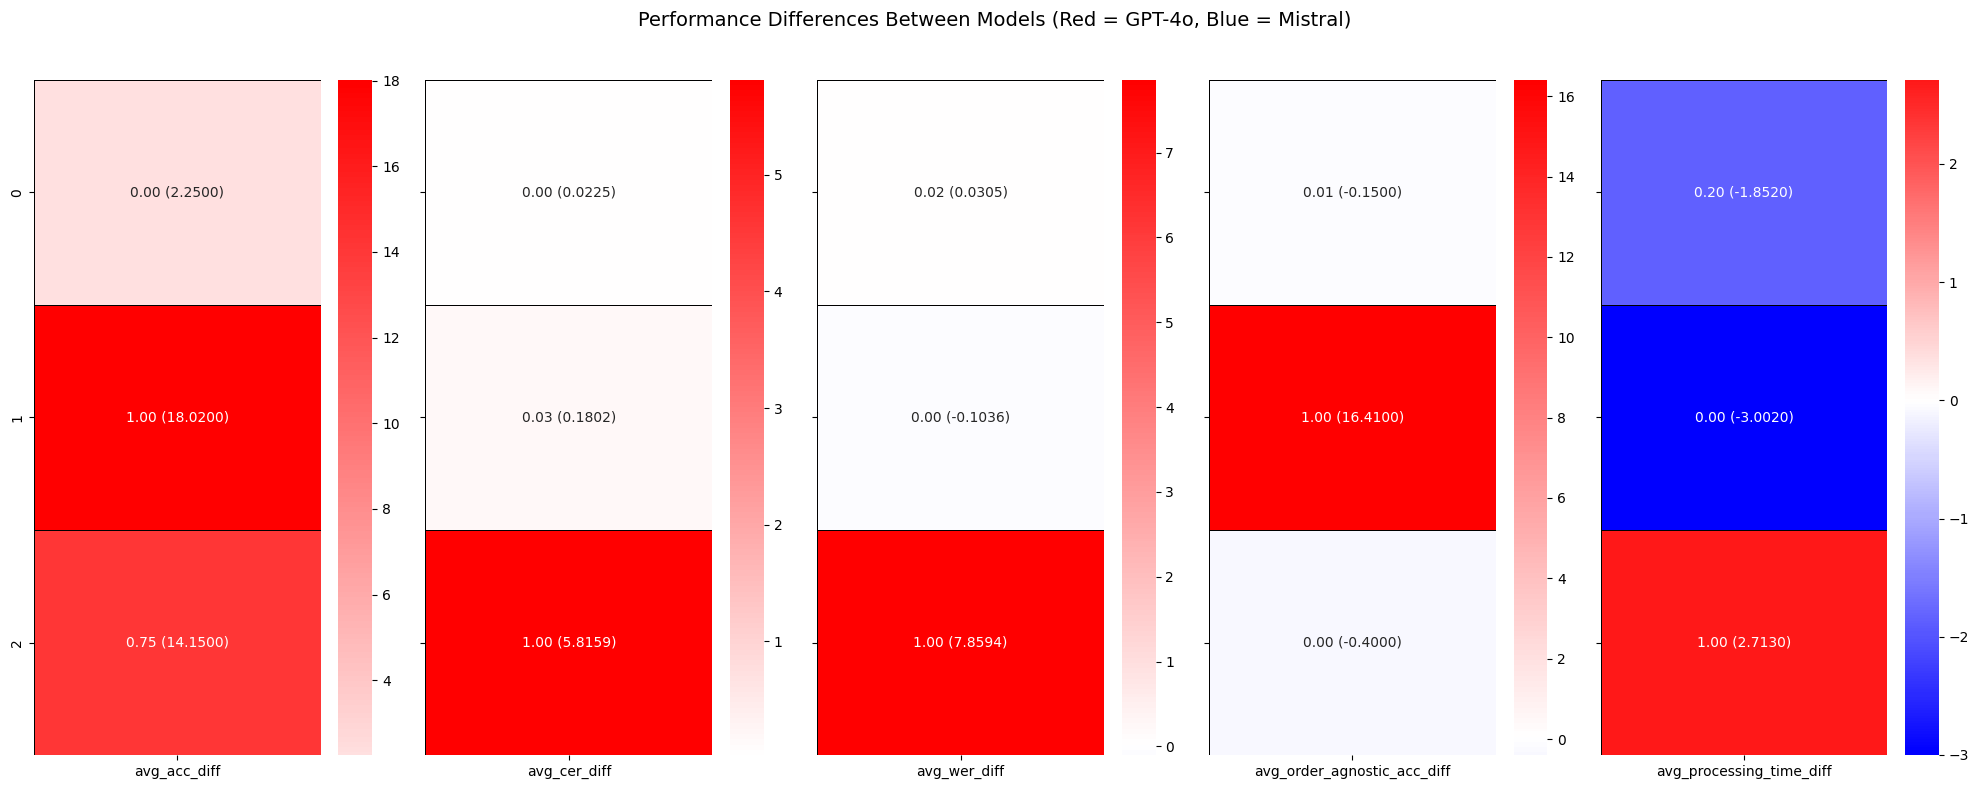

In [ ]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'
model_ids = ['gpt-4o', 'mistral-ocr-latest']

# Define metric direction: 1 means higher is better, -1 means lower is better
metric_directions = {
    'avg_acc': 1,  # Higher accuracy is better
    'avg_cer': -1,  # Lower Character Error Rate (CER) is better
    'avg_wer': -1,  # Lower Word Error Rate (WER) is better
    'avg_order_agnostic_acc': 1,  # Higher order-agnostic accuracy is better
    'avg_processing_time': -1  # Lower processing time is better
}

# Read all JSON files into a list of DataFrames
dfs = {}
for model_id in model_ids:
    with open(os.path.join(evaluation_summary_path, f"summary_data_{model_id}_vid.json"), 'r') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
        df = df[['model', 'vid', 'avg_acc', 'avg_cer', 'avg_wer', 'avg_order_agnostic_acc', 'avg_processing_time']]
        dfs[model_id] = df

# Merge DataFrames on 'vid'
merged_df = pd.merge(dfs[model_ids[0]], dfs[model_ids[1]], on='vid', suffixes=('_gpt4o', '_mistral'))

# Calculate transformed differences
metrics = list(metric_directions.keys())
for metric in metrics:
    direction = metric_directions[metric]

    # Transform difference to always have positive values when GPT-4o is better
    if direction == 1:  # Higher is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_gpt4o'] - merged_df[f'{metric}_mistral']
    else:  # Lower is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_mistral'] - merged_df[f'{metric}_gpt4o']

# Normalize each metric and store formatted values
normalized_df = merged_df.copy()
metrics_diff = [f"{metric}_diff" for metric in metrics]

for metric in metrics_diff:
    min_val = merged_df[metric].min()
    max_val = merged_df[metric].max()

    if max_val != min_val:  # Avoid division by zero
        normalized_values = (merged_df[metric] - min_val) / (max_val - min_val)
    else:
        normalized_values = merged_df[metric]  # Keep original values if there's no range

    # Store formatted values with original numbers
    normalized_df[metric] = [
        f"{norm_val:.2f} ({orig_val:.4f})" for norm_val, orig_val in zip(normalized_values, merged_df[metric])
    ]

# Custom colormap (red = GPT-4o better, blue = Mistral better)
cmap_red_blue = mcolors.LinearSegmentedColormap.from_list("red_blue", ["blue", "white", "red"])

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(metrics_diff), figsize=(20, 8), sharey=True)

# Convert original values to numeric for heatmap (since we formatted normalized_df with strings)
numeric_df = merged_df[metrics_diff]

# Plot each metric
for ax, metric in zip(axes, metrics_diff):
    sns.heatmap(
        numeric_df[[metric]],
        ax=ax,
        cmap=cmap_red_blue,
        center=0,  # Ensures white at zero
        cbar=True,
        annot=normalized_df[[metric]],
        fmt='',  # Use empty format since values are already formatted
        linewidths=0.5,
        linecolor='black'
    )
    ax.set_xlabel('')
    ax.set_ylabel('')

# Set common labels
fig.suptitle('Performance Differences Between Models (Red = GPT-4o, Blue = Mistral)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();


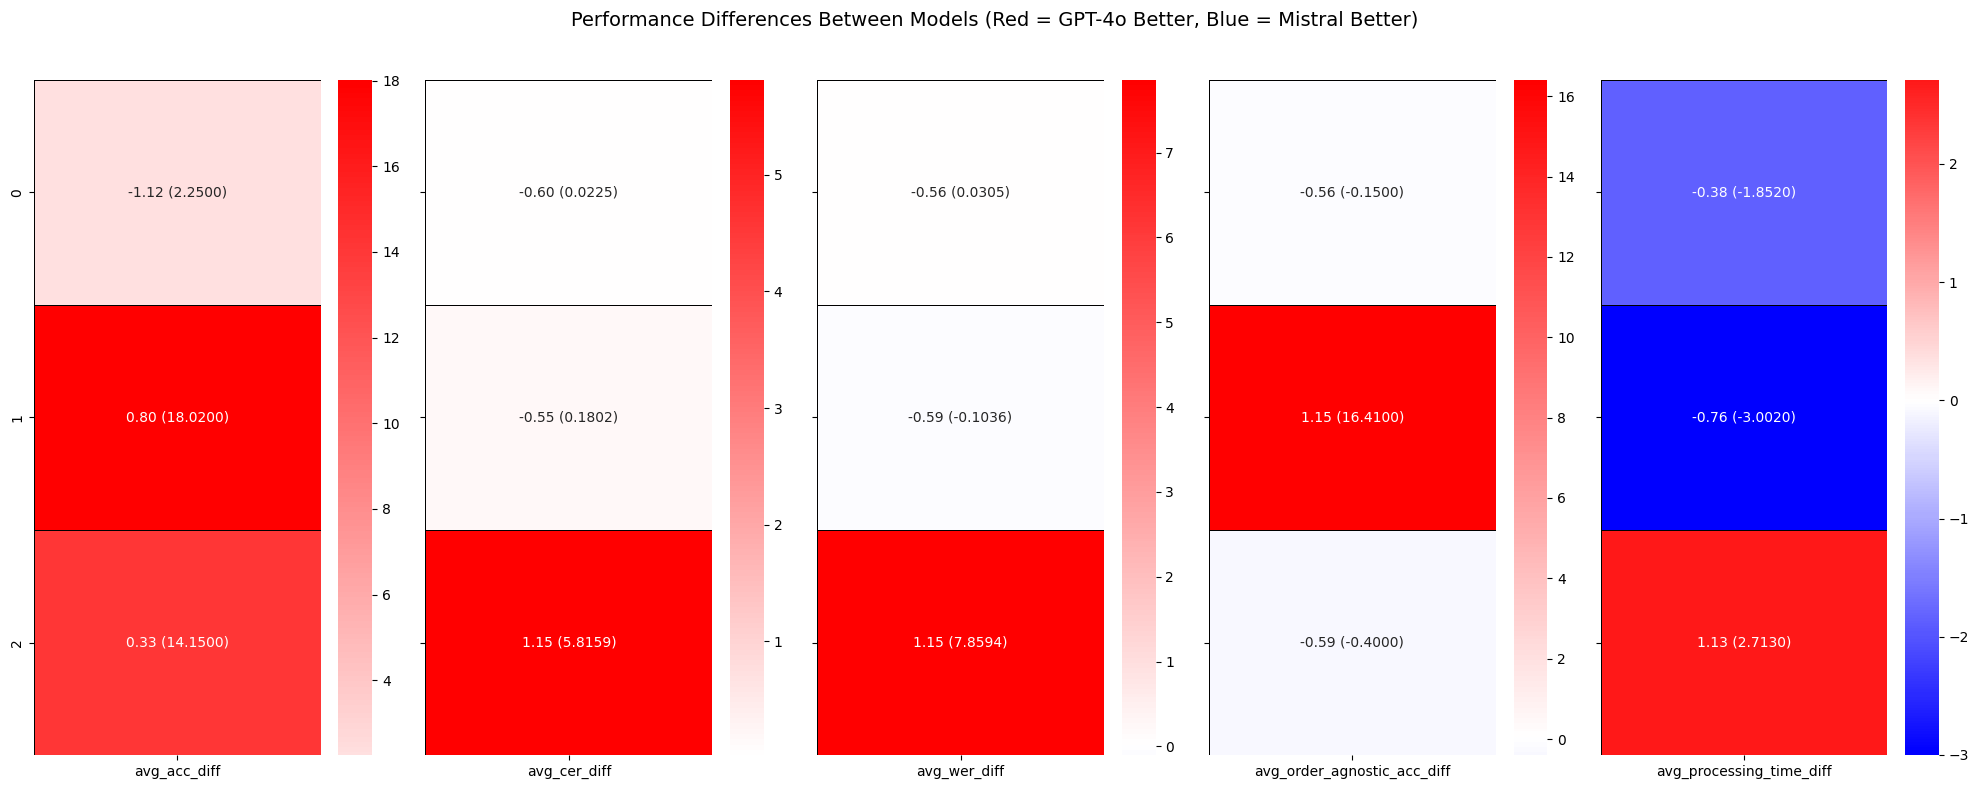

In [ ]:
import json
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

evaluation_summary_path = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/evaluation'
model_ids = ['gpt-4o', 'mistral-ocr-latest']

# Define metric direction: 1 means higher is better, -1 means lower is better
metric_directions = {
    'avg_acc': 1,  # Higher accuracy is better
    'avg_cer': -1,  # Lower Character Error Rate (CER) is better
    'avg_wer': -1,  # Lower Word Error Rate (WER) is better
    'avg_order_agnostic_acc': 1,  # Higher order-agnostic accuracy is better
    'avg_processing_time': -1  # Lower processing time is better
}

# Read all JSON files into a list of DataFrames
dfs = {}
for model_id in model_ids:
    with open(os.path.join(evaluation_summary_path, f"summary_data_{model_id}_vid.json"), 'r') as f:
        data = json.load(f)
        df = pd.DataFrame(data)
        df = df[['model', 'vid', 'avg_acc', 'avg_cer', 'avg_wer', 'avg_order_agnostic_acc', 'avg_processing_time']]
        dfs[model_id] = df

# Merge DataFrames on 'vid'
merged_df = pd.merge(dfs[model_ids[0]], dfs[model_ids[1]], on='vid', suffixes=('_gpt4o', '_mistral'))

# Calculate transformed differences
metrics = list(metric_directions.keys())
for metric in metrics:
    direction = metric_directions[metric]

    # Transform difference to always have positive values when GPT-4o is better
    if direction == 1:  # Higher is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_gpt4o'] - merged_df[f'{metric}_mistral']
    else:  # Lower is better
        merged_df[f'{metric}_diff'] = merged_df[f'{metric}_mistral'] - merged_df[f'{metric}_gpt4o']

# Z-score normalization
normalized_df = merged_df.copy()
metrics_diff = [f"{metric}_diff" for metric in metrics]

for metric in metrics_diff:
    mean_val = merged_df[metric].mean()
    std_val = merged_df[metric].std()

    if std_val != 0:  # Avoid division by zero
        z_scores = (merged_df[metric] - mean_val) / std_val
    else:
        z_scores = merged_df[metric]  # Keep original values if no variance

    # Store formatted values with original numbers
    normalized_df[metric] = [
        f"{z_score:.2f} ({orig_val:.4f})" for z_score, orig_val in zip(z_scores, merged_df[metric])
    ]

# Custom colormap (red = GPT-4o better, blue = Mistral better)
cmap_red_blue = mcolors.LinearSegmentedColormap.from_list("red_blue", ["blue", "white", "red"])

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=len(metrics_diff), figsize=(20, 8), sharey=True)

# Convert original values to numeric for heatmap (since we formatted normalized_df with strings)
numeric_df = merged_df[metrics_diff]

# Plot each metric
for ax, metric in zip(axes, metrics_diff):
    sns.heatmap(
        numeric_df[[metric]],
        ax=ax,
        cmap=cmap_red_blue,
        center=0,  # Ensures white at zero
        cbar=True,
        annot=normalized_df[[metric]],
        fmt='',  # Use empty format since values are already formatted
        linewidths=0.5,
        linecolor='black'
    )
    ax.set_xlabel('')  # Remove redundant labels
    ax.set_ylabel('')  # Remove redundant labels

# Set common labels
fig.suptitle('Performance Differences Between Models (Red = GPT-4o Better, Blue = Mistral Better)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show();


# Case Evaluation

In [ ]:
import pandas as pd
evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/mistral_results/mistral-ocr-latest'
# evaluation_model_dir = '/content/gdrive/MyDrive/Colab Notebooks/ocr/ocr/ocr_results/gpt_results/gpt-4o'

run_id = 'ocr_2025-03-10_00-41-53'
vid = 'm-z-0194c27c-d107-7030-b990-0b5cc62f514a.json'

evaluation_path = os.path.join(evaluation_model_dir, run_id, 'evaluations', vid)
evaluation_df = pd.read_json(evaluation_path)

In [ ]:
evaluation_df['image'] = evaluation_df['image'].str[0]
evaluation_df.columns = ['video_id','scene_start','scene_end','image','actual','predicted','cer','wer','accuracy','order_agnostic_accuracy','processing_time']

precision_dict = {'scene_end':0, 'cer': 4, 'wer': 4, 'accuracy': 2, 	'order_agnostic_accuracy': 2, 'processing_time': 3}

evaluation_df[list(precision_dict)] = evaluation_df[list(precision_dict)].round(precision_dict)

In [ ]:
lower_bound = -5 ; upper_bound = 0
evaluation_df = evaluation_df.query('accuracy.between(@lower_bound, @upper_bound)')
evaluation_df_sorted = evaluation_df.sort_values(by='accuracy', ascending=True)

# Select the top 10 rows
evaluation_df = evaluation_df_sorted.head(10)

In [ ]:
evaluation_df

,video_id,scene_start,scene_end,image,actual,predicted,cer,wer,accuracy,order_agnostic_accuracy,processing_time
0,m-z-0194c27c-d107-7030-b990-0b5cc62f514a,0,1.0,https://storage.videodb.io/media/u-0e58db00-6548-4d3c-b8c1-4ddddc072787/m-z-0194c27c-d107-7030-b990-0b5cc62f514a/frames/frm-scn-tt1sff1-0.0-1.0-0.5/img-f69d64eb-0e69-4bd9-b0ae-f08223747624.png,,![img-0.jpeg](img-0.jpeg),1.0,1.0,0.0,0.0,1.583


In [ ]:
import pandas as pd

import difflib
import pandas as pd

def highlight_differences(actual, predicted):
    """Highlight character-level differences between actual and predicted strings."""
    diff = difflib.ndiff(actual, predicted)
    highlighted_actual = ""
    highlighted_predicted = ""

    for d in diff:
        if d.startswith(" "):  # Matching character
            highlighted_actual += d[2]
            highlighted_predicted += d[2]
        elif d.startswith("-"):  # Character in actual but not in predicted
            highlighted_actual += f"<span style='color:#dc3545; font-weight:bold;'>{d[2]}</span>"
        elif d.startswith("+"):  # Character in predicted but not in actual
            highlighted_predicted += f"<span style='color:#28a745; font-weight:bold;'>{d[2]}</span>"

    return highlighted_actual, highlighted_predicted

def generate_html_table(df):
    html = "<table border='1' style='border-collapse: collapse; width: 100%;'>"

    for _, row in df.iterrows():
        # General Information Section
        html += "<tr style='background-color:#f2f2f2;'><th colspan='3'>General Information</th></tr>"
        html += "<tr><th>Video ID</th><th>Scene Start</th><th>Scene End</th></tr>"
        html += f"<tr><td>{row['video_id']}</td><td>{row['scene_start']}</td><td>{row['scene_end']}</td></tr>"

        # Image & Predictions Section
        html += "<tr style='background-color:#f2f2f2;'><th colspan='3'>Prediction Information</th></tr>"
        html += "<tr><th>Image</th><th>Actual</th><th>Predicted</th></tr>"

        # Get highlighted differences
        highlighted_actual, highlighted_predicted = highlight_differences(row['actual'], row['predicted'])

        html += f"<tr><td><img src='{row['image']}' style='max-width:500px; max-height:400px;'></td>"
        html += f"<td>{highlighted_actual}</td><td>{highlighted_predicted}</td></tr>"

        # Metrics Section
        html += "<tr style='background-color:#f2f2f2;'><th colspan='3'>Metrics</th></tr>"
        html += "<tr><th>Accuracy</th><th>cer</th><th>wer</th></tr>"
        html += f"<tr><td>{row['accuracy']}</td><td>{row['cer']}</td><td>{row['wer']}</td></tr>"

        # Separator Row for readability
        html += "<tr><td colspan='3' style='background-color:lightgray; height:5px;'></td></tr>"

    html += "</table>"
    return html




from IPython.core.display import display, HTML
html_table = generate_html_table(evaluation_df)
display(HTML(html_table))


# Sleep

In [ ]:
# import time
# time.sleep(30000)